In [14]:
import pandas as pd
data = pd.read_csv("C:\\Users\\mikha\\Downloads\\archive(2)\\CarPrice_Assignment.csv")

In [15]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

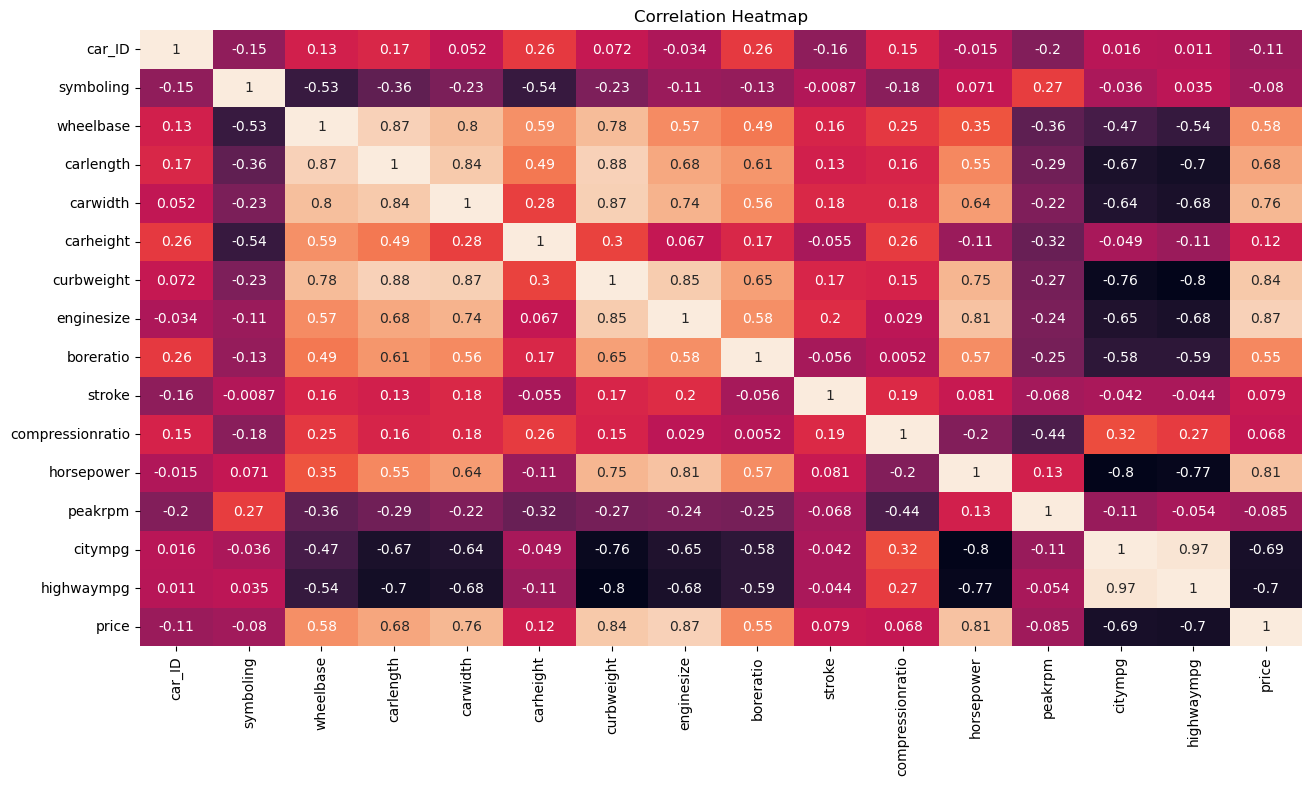

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_features = data.select_dtypes(include = ['int64', 'float64']).columns
numeric = data[numerical_features]

plt.figure(figsize=(15, 8))
sns.heatmap(numeric.corr(), annot=True, cbar=False)
plt.title('Correlation Heatmap')
plt.show()

In [18]:
data.drop(columns = ['symboling', 'carheight', 'stroke', 'compressionratio', 'peakrpm', 'CarName','highwaympg'], axis=1, inplace=True)

In [19]:
numerical_features = data.select_dtypes(include = ['int64', 'float64']).columns
cat_features = data.select_dtypes(exclude = ['int64', 'float64']).columns
print("Numerical Features:\n", numerical_features)
print("Categorical Features:\n", cat_features)

Numerical Features:
 Index(['car_ID', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'price'],
      dtype='object')
Categorical Features:
 Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')


In [20]:
cat_features = data.select_dtypes(exclude = ['int64', 'float64']).columns

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for columns in cat_features:
    data[columns] = label_encoder.fit_transform(data[columns])

In [21]:
from sklearn.model_selection import train_test_split
import numpy as np

y = data['price']
x = data.drop('price', axis=1)

y=np.array(y)
x=np.array(x)

X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
rfr = RandomForestRegressor()

rfr.fit(X_train, Y_train)

y_pred = rfr.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("r2 score", r2_score(y_test, y_pred))

MAE: 1264.68056097561
MSE: 3459766.3972607087
r2 score 0.956174434001344
